In [50]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [40]:
data = pd.read_csv('/home/lionex/bin/Python/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot: >

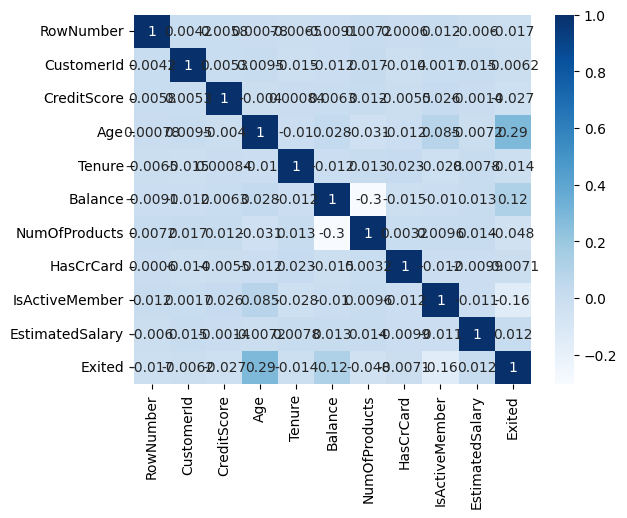

In [41]:
sns.heatmap(data.corr(),cmap='Blues',annot=True)

In [42]:
X = data.iloc[:,3:13].values
y = data.iloc[:,13].values

In [43]:
X[:,1] = LabelEncoder().fit_transform(X[:,1])
X[:,2] = LabelEncoder().fit_transform(X[:,2])
transforms = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1])],remainder='passthrough')
X = transforms.fit_transform(X.tolist())
X = X.astype('float64')

In [44]:
X = X[:,1:]

In [45]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [46]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)


Epoch 1/50
536/536 [==============================] - 2s 2ms/step - loss: 0.5946 - accuracy: 0.7024 - val_loss: 0.4847 - val_accuracy: 0.8046
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4833 - accuracy: 0.7987 - val_loss: 0.4568 - val_accuracy: 0.8039
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.7998 - val_loss: 0.4405 - val_accuracy: 0.8050
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8035 - val_loss: 0.4315 - val_accuracy: 0.8054
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.8057 - val_loss: 0.4244 - val_accuracy: 0.8061
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8102 - val_loss: 0.4214 - val_accuracy: 0.8073
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8112 - val_loss: 0.4173 - val_accuracy: 0.8080
Epoch 

63/63 [==============================] - 0s 1ms/step
Accuracy =  0.8685


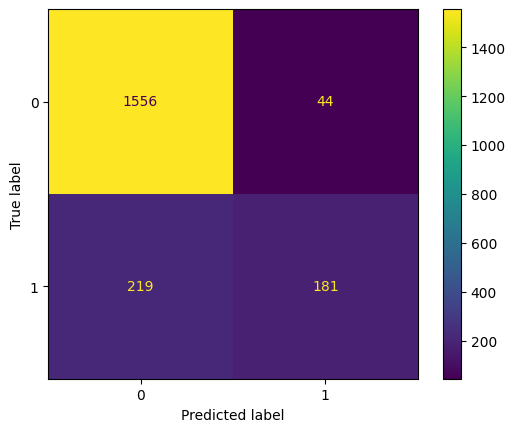

In [52]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
print('Accuracy = ', accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()